# MidTerm Project: Predicting Life Expectancy
## Predicting Life Expectancy using Linear Regression

## Goal
Build a linear regression model to predict the life expectancy of people in a country based on various immunization factors and the country in which they are based out of, so that necessary action can be taken to increase the life expectancy.

## 1. Data Exploration and Understanding

In [105]:
# importing libraries and reading the data
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('life_expct_data.csv')

In [5]:
# showing first rows
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# find empty values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

The dataset has a lot of missing values

In [7]:
# Checking the datatypes
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
# getting the rows and columns
df.shape

(2938, 22)

The value that has the most null values is population with at least 22% of the column as null.

## 2. EDA and Data Preprocessing

In [9]:
# checking duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [10]:
# general information of the dataset
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


- There should be an outlier in life expectancy for sure 
- Outliers in adult mortality too 
- infant deaths outliers 
- percentage expenditure can be tricky since is very variant and also too much diference between max and min and there's 0 value
- There's a minimal value for BMI as 1 
- under five deaths information also varies 
- polio too is variable
- gdp minimum value is 1 but there's also a lot of null values

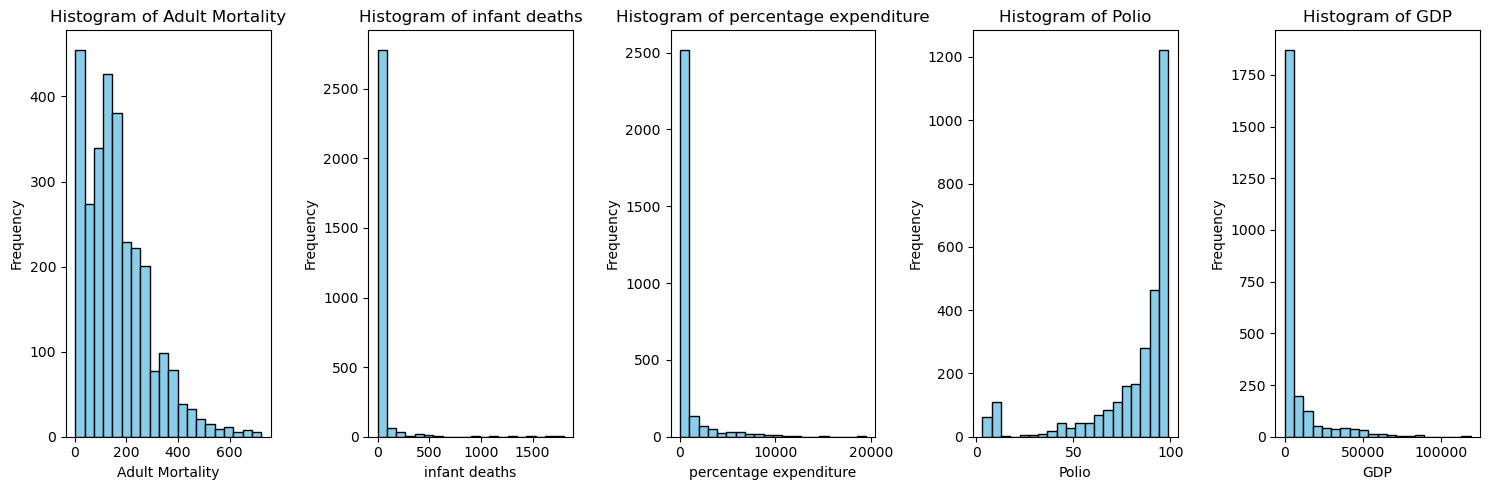

In [11]:
columns = ["Adult Mortality", "infant deaths", "percentage expenditure", "Polio", "GDP"]

# plotting area
plt.figure(figsize=(15, 5))

# loop through the selected columns and creating a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
# zero_adult_mortality = df[df["Adult Mortality"] == 0]
# zero_adult_mortality = df[df["percentage expenditure"] == 0]
    zero_adult_mortality = df[df["infant deaths"] == 0]
print(zero_adult_mortality)

      Country  Year      Status  Life expectancy   Adult Mortality  \
16    Albania  2015  Developing              77.8             74.0   
17    Albania  2014  Developing              77.5              8.0   
18    Albania  2013  Developing              77.2             84.0   
19    Albania  2012  Developing              76.9             86.0   
20    Albania  2011  Developing              76.6             88.0   
...       ...   ...         ...               ...              ...   
2853  Vanuatu  2004  Developing              69.6            169.0   
2854  Vanuatu  2003  Developing              69.4            173.0   
2855  Vanuatu  2002  Developing              69.3            176.0   
2856  Vanuatu  2001  Developing              69.1            179.0   
2857  Vanuatu  2000  Developing              69.0             18.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
16                0     4.60              364.975229         99.0         0   
1

### Comments
For thos columns that have a 0 as most frequent value is ok to fill them up with the mean, as nmost of them are null values. 

### a. Handling Missing Values:

In [14]:
# Dropping null values of life expectancy
df = df.dropna(subset=['Life expectancy '])

# Filling missing values with the mean
for col in df.columns:
  if df[col].dtype!=object:
    df.loc[df[col].isnull(),col]=df[col].mean()
df_clean=df

# Checking the missing values again
df.isnull().sum()


C:\Users\HP-PRO 10\AppData\Local\Temp\ipykernel_22704\3441160123.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2007.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isnull(),col]=df[col].mean()
C:\Users\HP-PRO 10\AppData\Local\Temp\ipykernel_22704\3441160123.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.407445355191257' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isnull(),col]=df[col].mean()
C:\Users\HP-PRO 10\AppData\Local\Temp\ipykernel_22704\3441160123.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2427.85587431694' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col].isnull(),col]=df[

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### Checking correlations to select important features and see Top 5 features

In [15]:
# Checking correlation matrix
# Filter columns that are numerical in the original df
numerical_df = df.select_dtypes(include=[float, int])
correlation_matrix = numerical_df.corr()
correlation_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044669,0.032723,0.090739,-0.081840,0.104094,-0.041980,0.094158,0.078679,0.134333,-0.138789,0.094443,0.015180,-0.044835,-0.047888,0.236222,0.207357
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.392420,0.381864,0.204566,-0.157586,0.562453,-0.222529,0.462592,0.209628,0.476442,-0.556556,0.430551,-0.019629,-0.472778,-0.467231,0.692621,0.718614
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.190791,-0.242860,-0.139146,0.031176,-0.383641,0.094146,-0.273295,-0.111772,-0.273602,0.523821,-0.277081,-0.012509,0.300262,0.305767,-0.440154,-0.437255
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.114806,-0.085906,-0.179724,0.501038,-0.227427,0.996628,-0.171049,-0.126769,-0.175524,0.024955,-0.107327,0.548547,0.465590,0.471229,-0.143554,-0.193232
Alcohol,-0.044669,0.392420,-0.190791,-0.114806,1.000000,0.339454,0.074245,-0.051786,0.325939,-0.111781,0.214038,0.300901,0.215578,-0.049719,0.318622,-0.030934,-0.420607,-0.409477,0.417014,0.498167
percentage expenditure,0.032723,0.381864,-0.242860,-0.085906,0.339454,1.000000,0.011988,-0.056831,0.230976,-0.088152,0.147608,0.175222,0.143967,-0.098230,0.888213,-0.024704,-0.252228,-0.253761,0.380713,0.389898
Hepatitis B,0.090739,0.204566,-0.139146,-0.179724,0.074245,0.011988,1.000000,-0.090827,0.139102,-0.185377,0.406308,0.060839,0.498359,-0.103061,0.062259,-0.110472,-0.106911,-0.110112,0.151143,0.165083
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.051786,-0.056831,-0.090827,1.000000,-0.176019,0.507718,-0.136440,-0.104730,-0.142154,0.030673,-0.068222,0.236236,0.224516,0.220774,-0.115678,-0.123611
BMI,0.104094,0.562453,-0.383641,-0.227427,0.325939,0.230976,0.139102,-0.176019,1.000000,-0.237833,0.285168,0.228134,0.283995,-0.243575,0.279664,-0.063235,-0.530805,-0.537784,0.482317,0.519223
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.111781,-0.088152,-0.185377,0.507718,-0.237833,1.000000,-0.189120,-0.128472,-0.196065,0.037783,-0.110864,0.535889,0.467620,0.472091,-0.161428,-0.208674


In [16]:
# Sort correlations with "Life expectancy" in descending order
life_expectancy_corr = correlation_matrix["Life expectancy "].sort_values(ascending=False)
life_expectancy_corr

Life expectancy                    1.000000
Schooling                          0.718614
Income composition of resources    0.692621
 BMI                               0.562453
Diphtheria                         0.476442
Polio                              0.462592
GDP                                0.430551
Alcohol                            0.392420
percentage expenditure             0.381864
Total expenditure                  0.209628
Hepatitis B                        0.204566
Year                               0.170033
Population                        -0.019629
Measles                           -0.157586
infant deaths                     -0.196557
under-five deaths                 -0.222529
 thinness 5-9 years               -0.467231
 thinness  1-19 years             -0.472778
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

### Comments
The top 5 features are: Schooling, Income composition of resources, BMI, Diphteria and Polio.
In the next step I'll drop all the features (columns) that have a negative correlation.

In [17]:
#Drop the irrelevant features from the original df dropping the values that we saw are not relevant according the correlation
df.drop(['Population', 'Measles ', 'infant deaths', ' thinness 5-9 years', ' thinness  1-19 years', ' HIV/AIDS', 'Adult Mortality'], axis=1, inplace=True)
df.head(5)

,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,0.01,71.279624,65.0,19.1,83.0,6.0,8.16,65.0,584.259210,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,0.01,73.523582,62.0,18.6,86.0,58.0,8.18,62.0,612.696514,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,0.01,73.219243,64.0,18.1,89.0,62.0,8.13,64.0,631.744976,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,0.01,78.184215,67.0,17.6,93.0,67.0,8.52,67.0,669.959000,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,0.01,7.097109,68.0,17.2,97.0,68.0,7.87,68.0,63.537231,0.454,9.5


### b. Encoding categorical feature

In [18]:
# Checking the categories that the Status columns has
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [19]:
# One Hot Encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=["Status", "Country"], prefix=["Status", "Country"])
# Display the resulting DataFrame
df_encoded

,Year,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015.0,65.0,0.01,71.279624,65.0,19.1,83.0,6.0,8.16,65.0,...,False,False,False,False,False,False,False,False,False,False
1,2014.0,59.9,0.01,73.523582,62.0,18.6,86.0,58.0,8.18,62.0,...,False,False,False,False,False,False,False,False,False,False
2,2013.0,59.9,0.01,73.219243,64.0,18.1,89.0,62.0,8.13,64.0,...,False,False,False,False,False,False,False,False,False,False
3,2012.0,59.5,0.01,78.184215,67.0,17.6,93.0,67.0,8.52,67.0,...,False,False,False,False,False,False,False,False,False,False
4,2011.0,59.2,0.01,7.097109,68.0,17.2,97.0,68.0,7.87,68.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,4.36,0.000000,68.0,27.1,42.0,67.0,7.13,65.0,...,False,False,False,False,False,False,False,False,False,True
2934,2003.0,44.5,4.06,0.000000,7.0,26.7,41.0,7.0,6.52,68.0,...,False,False,False,False,False,False,False,False,False,True
2935,2002.0,44.8,4.43,0.000000,73.0,26.3,40.0,73.0,6.53,71.0,...,False,False,False,False,False,False,False,False,False,True
2936,2001.0,45.3,1.72,0.000000,76.0,25.9,39.0,76.0,6.16,75.0,...,False,False,False,False,False,False,False,False,False,True


### Comments
The application of one hot encoding is justified as the project's goal is to predict the life expectancy of people in a country based on various immunization factors and the country in which they are based. So making a prioritization like label encoding does won't be important for this goal.

## 3. Feature Engineering
### Feature Scaling:

In [20]:
# Separating features (X) and target variable (y)

X = df_encoded.drop("Life expectancy ", axis=1) # Dropping "Life expectancy" to use all other columns as features
y = df_encoded["Life expectancy "]  # Setting "Life expectancy" as the target variable

# Display to verify the split
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
     Year  Alcohol  percentage expenditure  Hepatitis B   BMI   \
0  2015.0     0.01               71.279624         65.0   19.1   
1  2014.0     0.01               73.523582         62.0   18.6   
2  2013.0     0.01               73.219243         64.0   18.1   
3  2012.0     0.01               78.184215         67.0   17.6   
4  2011.0     0.01                7.097109         68.0   17.2   

   under-five deaths   Polio  Total expenditure  Diphtheria          GDP  ...  \
0                83.0    6.0               8.16         65.0  584.259210  ...   
1                86.0   58.0               8.18         62.0  612.696514  ...   
2                89.0   62.0               8.13         64.0  631.744976  ...   
3                93.0   67.0               8.52         67.0  669.959000  ...   
4                97.0   68.0               7.87         68.0   63.537231  ...   

   Country_United Republic of Tanzania  Country_United States of America  \
0                         

In [21]:
# Making copies for the different scalers
X_min_copy = X.copy()
X_robust_copy = X.copy()

In [22]:
# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Fitting and transforming training data
std_scaled_data = standard_scaler.fit_transform(X)
minmax_scaled_data = min_max_scaler.fit_transform(X_min_copy)
robust_scaled_data = robust_scaler.fit_transform(X_robust_copy)

# Converting them into DataFrame
std_scaler_df = pd.DataFrame(std_scaled_data, columns=X.columns)
minmax_scaler_df = pd.DataFrame(minmax_scaled_data, columns=X.columns)
robust_scaler_df = pd.DataFrame(robust_scaled_data, columns=X.columns)

In [23]:
std_scaler_df.head()

,Year,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1.626978,-1.176432,-0.336102,-0.708504,-0.964155,0.254061,-3.280188,0.934915,-0.733165,-0.525277,...,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125
1,1.410048,-1.176432,-0.334975,-0.841675,-0.989348,0.272732,-1.051924,0.943300,-0.860146,-0.523115,...,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125
2,1.193118,-1.176432,-0.335128,-0.752895,-1.014541,0.291403,-0.880520,0.922336,-0.775492,-0.521667,...,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125
3,0.976187,-1.176432,-0.332633,-0.619724,-1.039734,0.316299,-0.666263,1.085854,-0.648511,-0.518762,...,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125
4,0.759257,-1.176432,-0.368345,-0.575334,-1.059889,0.341194,-0.623412,0.813325,-0.606184,-0.564861,...,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125,-0.074125


In [24]:
minmax_scaler_df.head()

,Year,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1.000000,0.0,0.003659,0.653061,0.236292,0.0332,0.031250,0.452118,0.649485,0.004889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.933333,0.0,0.003774,0.622449,0.229765,0.0344,0.572917,0.453279,0.618557,0.005127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.866667,0.0,0.003759,0.642857,0.223238,0.0356,0.614583,0.450377,0.639175,0.005287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.800000,0.0,0.004014,0.673469,0.216710,0.0372,0.666667,0.473012,0.670103,0.005608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.733333,0.0,0.000364,0.683673,0.211488,0.0388,0.677083,0.435287,0.680412,0.000519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
robust_scaler_df.head()

,Year,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,GDP,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1.000000,-0.659515,0.012948,-1.462848,-0.651226,2.821429,-4.578947,0.753323,-1.473684,-0.365604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.866667,-0.659515,0.018074,-1.662327,-0.664850,2.928571,-1.842105,0.760080,-1.631579,-0.361492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.733333,-0.659515,0.017379,-1.529341,-0.678474,3.035714,-1.631579,0.743188,-1.526316,-0.358737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.600000,-0.659515,0.028721,-1.329862,-0.692098,3.178571,-1.368421,0.874945,-1.368421,-0.353211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.466667,-0.659515,-0.133668,-1.263369,-0.702997,3.321429,-1.315789,0.655350,-1.315789,-0.440903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comments
As robust scaling is less sensitive to outliers compared to standardization is going to be selected for this project.

## 4. Model Building

### Initial train-test split of 60% and 40%.

In [26]:
# Splitting data into training and testing sets
# Split data using 60/40 for the first test
X_train_60_robust, X_test_40_robust, y_train_60_robust, y_test_40_robust = train_test_split(robust_scaled_data, y, test_size=0.4, random_state=42)

## 4.1. Multiple Linear Regression

In [27]:
# Building and training the multiple linear regression model
mlr = LinearRegression()
mlr.fit(X_train_60_robust, y_train_60_robust)

LinearRegression()

In [29]:
# predictions to evaluate the model
y_mlr_pred = mlr.predict(X_test_40_robust)

### 4.1.1. Multiple Linear Regression - Model Evaluation

In [51]:
# Making all the evaluation metrics
mae = mean_absolute_error(y_test_40_robust, y_mlr_pred)
mse = mean_squared_error(y_test_40_robust, y_mlr_pred)
r2 = r2_score(y_test_40_robust, y_mlr_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  1.3398287060317733
Mean Squared Error:  4.764512645554204
R2 coefficient:  0.9477209396037509


### Comments
Since the Life Expectancy values vary between 0 to at least 90. The MSE levels are acceptable meaning predictions differ from actual values by about √4.76 ≈ 2.18 units and since the r2 score is also 0.947 which indicates a good model.

    ### 4.1.2. Finding the best fit line

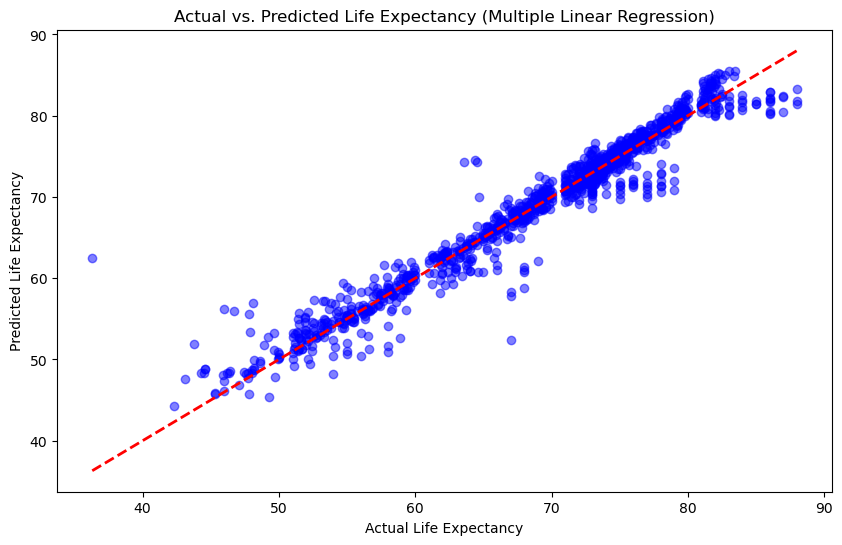

In [46]:
# Plot actual vs. predicted life expectancy values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_40_robust, y_mlr_pred, alpha=0.5, color="blue")
plt.plot([y_test_40_robust.min(), y_test_40_robust.max()], [y_test_40_robust.min(), y_test_40_robust.max()], 'r--', lw=2)  # Diagonal line for reference

# Add labels and title
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Multiple Linear Regression)")
plt.show()

In [55]:
# Showing the equation
# Get the slope (coefficient) and intercept
mlr_coef = mlr.coef_[0]
mlr_inter = mlr.intercept_

# Create the equation string
equation_mlr = f"Equation for the fit line is: y = {mlr_coef:.2f}x + {mlr_inter:.2f}"
equation_mlr

'Equation for the fit line is: y = 2.60x + 63664026504.00'

### Comments
This line adjust to the model and since the mse and r2 of 0.947 are acceptable numbers this can be considered a good model to predict the life expectancy.

### 4.1.3 Cross Validation - K-Fold Cross-Validation

In [108]:
# Set up K-Fold Cross-Validation (Multiple Folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Apply cross-validation to get negative MSE scores
mse_scores = cross_val_score(mlr, X_train_60_robust, y_train_60_robust, cv=kf, scoring='neg_mean_squared_error')
# Apply cross-validation to get R^2 scores
r2_scores = cross_val_score(mlr, X_train_60_robust, y_train_60_robust, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate average score
mean_mse = -np.mean(mse_scores)
mean_r2 = np.mean(r2_scores)

print(f'Mean MSE from K-Fold Cross-Validation on Training Data: {mean_mse:.2f}')
print(f'Mean r^2 from K-Fold Cross-Validation on Training Data: {mean_r2:.2f}')

Mean MSE from K-Fold Cross-Validation on Training Data: 5.08
Mean r^2 from K-Fold Cross-Validation on Training Data: 0.94


### Comments
- The K-Fold Cross - Vaidation method didn't improve the model but it actually kept the same r2 but the difference is that the MSE got a larger value by one more point.
- Since the r2 score remained constant and the MSE increased, it indicates that while the model's explanatory power didn't change, its accuracy in predicting individual data points became worse.
- As the performance (in terms of MSE) deteriorates, it suggests that the model might be overfitting to certain folds or that the model configuration could be improved.
## 4.2. Simple linear regression to find the most important feature.

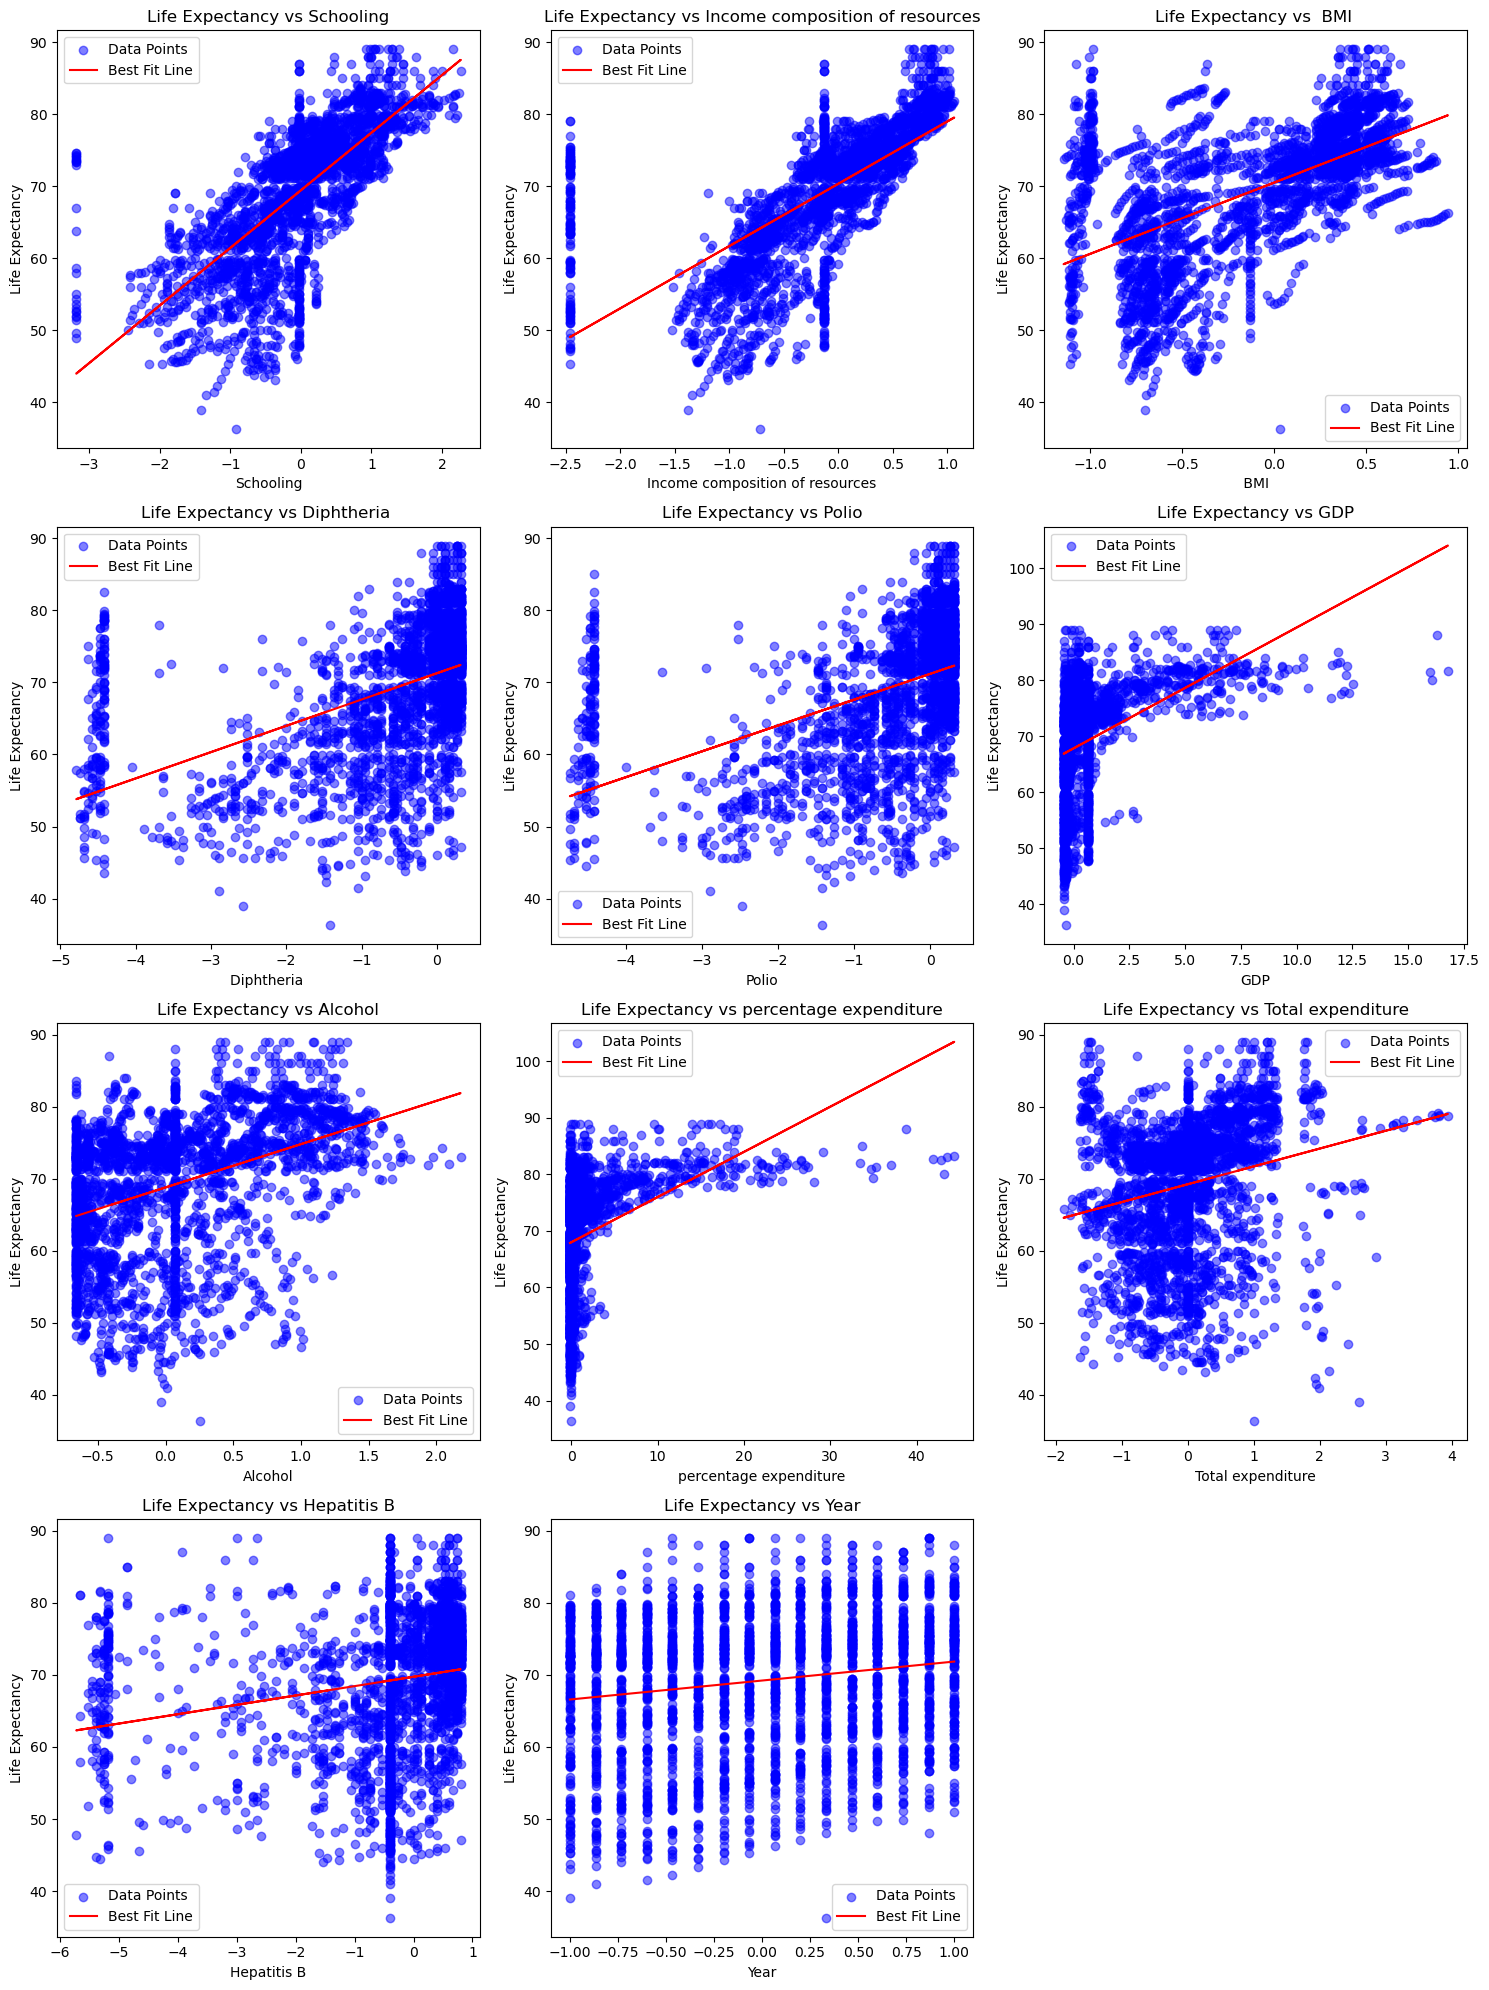

In [44]:
# List of features to plot against "Life expectancy"
features = ["Schooling", "Income composition of resources", " BMI ", "Diphtheria ", 
            "Polio", "GDP", "Alcohol", "percentage expenditure", 
            "Total expenditure", "Hepatitis B", "Year"]

# Set up the plot grid
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # Create a 4x3 grid of plots

    # Use only the current feature from the scaled DataFrame
    X_feature = robust_scaler_df[[feature]].values
    y = df_encoded["Life expectancy "].values

    #  Making a separate linear regression model for each individual feature purely for visualization purposes.
    feature_mlr = LinearRegression()
    feature_mlr.fit(X_feature, y)
    y_pred = feature_mlr.predict(X_feature)  # Prediction for the line of best fit

    # Scatter plot for the feature vs. Life expectancy
    plt.scatter(X_feature, y, color="blue", alpha=0.5, label="Data Points")
    plt.plot(X_feature, y_pred, color="red", label="Best Fit Line")

    plt.xlabel(feature)
    plt.ylabel("Life Expectancy")
    plt.title(f"Life Expectancy vs {feature}")
    plt.legend()
# Adjust layout to avoid overlap
plt.tight_layout()  
plt.show()

### Comments
We can see that the most important feature is "Schooling" visually because it's the one that it's closest and follows the regression line more than the other features. Another important one can also be income.

### 4.2.1. Simple linear regression "Schooling"

In [82]:
# Select the "Schooling" feature and the target "Life expectancy"
X_s = robust_scaler_df[["Schooling"]]  # Independent variable as a DataFrame
y = df_encoded["Life expectancy "]  # Target variable

# Split the data into training and testing sets (e.g., 60% train, 40% test)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y, test_size=0.4, random_state=42)

In [83]:
# Fit a simple linear regression for "Schooling" to find the best fit line
schooling_mlr = LinearRegression()
schooling_mlr.fit(X_train_s, y_train_s)  # Train on the training data
y_pred_schooling = schooling_mlr.predict(X_test_s)  # Predict on the test data

In [72]:
# Prediction for the line of best fit
y_pred_schooling = schooling_mlr.predict(X_test_s)

### 4.2.3. Simple linear regresion - Model Evaluation

In [87]:
# Making all the evaluation metrics
mae_sl = mean_absolute_error(y_test_s, y_pred_schooling)
mse_sl = mean_squared_error(y_test_s, y_pred_schooling)
r2_sl = r2_score(y_test_s, y_pred_schooling)

print('Mean Absolute Error: ', mae_sl)
print('Mean Squared Error: ', mse_sl)
print('R2 coefficient: ', r2_sl)

Mean Absolute Error:  4.800630143300575
Mean Squared Error:  43.417404008173385
R2 coefficient:  0.5235984758043137


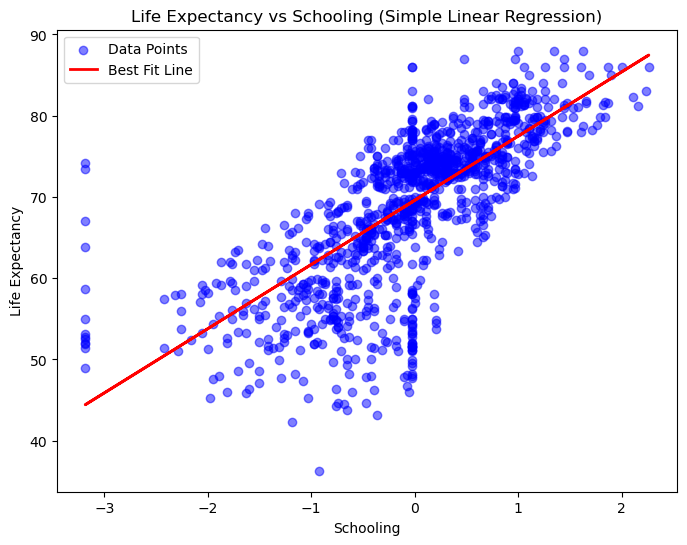

In [86]:
# Plot for "Schooling" vs. "Life expectancy"
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s, y_test_s, color="blue", alpha=0.5, label="Data Points")  # Actual data points
plt.plot(X_test_s, y_pred_schooling, color="red", label="Best Fit Line", linewidth=2)  # Best fit line

# Add labels and title
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Schooling (Simple Linear Regression)")
plt.legend()
plt.show()


In [88]:
# Showing the equation
# Get the slope (coefficient) and intercept
m = schooling_mlr.coef_[0]
b = schooling_mlr.intercept_

# Create the equation string
equation = f"Equation for the fit line is: y = {m:.2f}x + {b:.2f}"
equation

'Equation for the fit line is: y = 7.90x + 69.58'

## 5. Second train-test split of 80% and 20%.
### 5.1. Multiple Regression Model

In [97]:
# Splitting data into training and testing sets
# Split data using 60/40 for the first test
X_train_2_robust, X_test_2_robust, y_train_2_robust, y_test_2_robust = train_test_split(robust_scaled_data, y, test_size=0.2, random_state=42)

# Building and training the multiple linear regression model
mlr_2 = LinearRegression()
mlr_2.fit(X_train_2_robust, y_train_2_robust)

# predictions to evaluate the model
y_2_pred = mlr_2.predict(X_test_2_robust)

### 5.1.1. Multiple Linear Regression - Model Evaluation

In [98]:
# Making all the evaluation metrics
mae_2 = mean_absolute_error(y_test_2_robust, y_2_pred)
mse_2 = mean_squared_error(y_test_2_robust, y_2_pred)
r2_2 = r2_score(y_test_2_robust, y_2_pred)

print('Mean Absolute Error: ', mae_2)
print('Mean Squared Error: ', mse_2)
print('R2 coefficient: ', r2_2)

Mean Absolute Error:  1.3243335684704889
Mean Squared Error:  4.532398113769033
R2 coefficient:  0.9476019718973192


### 5.1.2. Multiple Linear Regression 80 | 20 graph

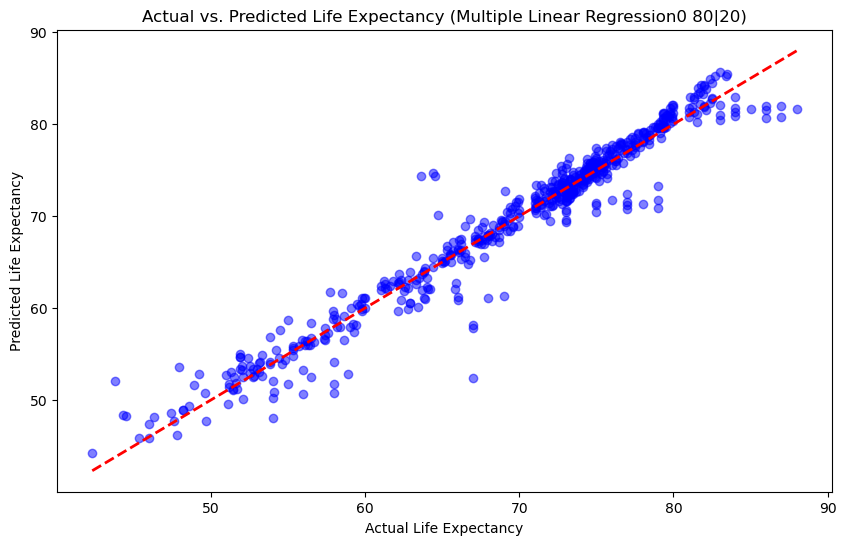

In [99]:
# Plot actual vs. predicted life expectancy values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_2_robust, y_2_pred, alpha=0.5, color="blue")
plt.plot([y_test_2_robust.min(), y_test_2_robust.max()], [y_test_2_robust.min(), y_test_2_robust.max()], 'r--', lw=2)  # Diagonal line for reference

# Add labels and title
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Multiple Linear Regression0 80|20)")
plt.show()

In [100]:
# Showing the equation
# Get the slope (coefficient) and intercept
mlr_coef2 = mlr_2.coef_[0]
mlr_inter2 = mlr_2.intercept_

# Create the equation string
equation_mlr = f"Equation for the fit line is: y = {mlr_coef2:.2f}x + {mlr_inter2:.2f}"
equation_mlr

'Equation for the fit line is: y = 2.55x + 67.39'

### Comments
Seeing the last multiple regression line model the r2 indicator is just 0.01 less in this model and all the other values are alike.

### 5.1.3 Cross Validation - K-Fold Cross-Validation

In [109]:
# Set up K-Fold Cross-Validation (Multiple Folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Apply cross-validation to get negative MSE scores
mse_scores2 = cross_val_score(mlr_2, X_train_2_robust, y_train_2_robust, cv=kf, scoring='neg_mean_squared_error')
# Apply cross-validation to get R^2 scores
r2_scores2 = cross_val_score(mlr_2, X_train_2_robust, y_train_2_robust, cv=kf, scoring='r2')

# Convert negative MSE to positive and calculate average score
mean_mse2 = -np.mean(mse_scores2)
mean_r22 = np.mean(r2_scores2)

print(f'Mean MSE from K-Fold Cross-Validation on Training Data: {mean_mse2:.2f}')
print(f'Mean r^2 from K-Fold Cross-Validation on Training Data: {mean_r22:.2f}')

Mean MSE from K-Fold Cross-Validation on Training Data: 4.96
Mean r^2 from K-Fold Cross-Validation on Training Data: 0.95


### Comments
- This time the r2 levels improved by +0.01 which means slightly better explanatory power but worse predictive accuracy. And as the MSE increased it means that the accuracy is moving a bit far away from the actual values. Which again may suggest overfitting.

## 5.2. Simple linear regression 80 | 20 
Taking in account that "Schooling" was the most important feature according the correlation matrix

In [101]:
# Select the "Schooling" feature and the target "Life expectancy"
X_s2 = robust_scaler_df[["Schooling"]]  # Independent variable as a DataFrame
y2 = df_encoded["Life expectancy "]  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(X_s2, y2, test_size=0.2, random_state=42)

# Fit a simple linear regression for "Schooling" to find the best fit line
schooling_2 = LinearRegression()
schooling_2.fit(X_train_s2, y_train_s2)  # Train on the training data
y_pred_schooling2 = schooling_2.predict(X_test_s2)  # Predict on the test data

# Prediction for the line of best fit
y_pred_schooling2 = schooling_2.predict(X_test_s2)

### 5.2.3. Simple linear regresion - Model Evaluation

In [102]:
# Making all the evaluation metrics
mae_sl2 = mean_absolute_error(y_test_s2, y_pred_schooling2)
mse_sl2 = mean_squared_error(y_test_s2, y_pred_schooling2)
r2_sl2 = r2_score(y_test_s2, y_pred_schooling2)

print('Mean Absolute Error: ', mae_sl2)
print('Mean Squared Error: ', mse_sl2)
print('R2 coefficient: ', r2_sl2)


Mean Absolute Error:  4.628985518313734
Mean Squared Error:  38.517940744245706
R2 coefficient:  0.5547028105401706


### 5.2.4. Simple linear regression 80|20 graph

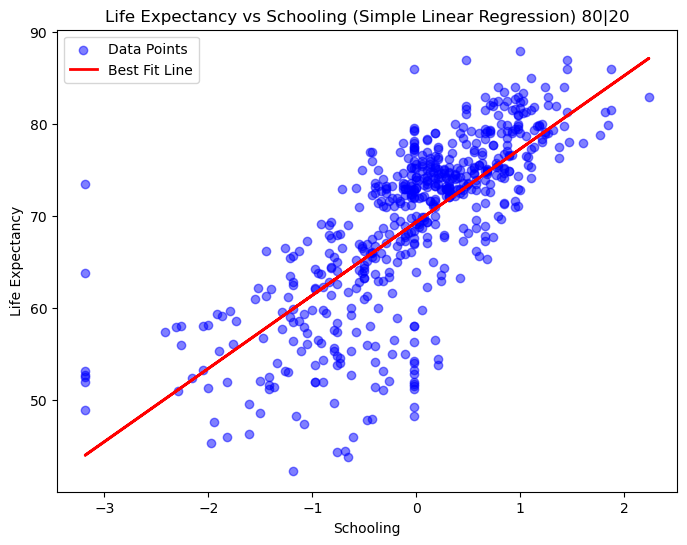

In [103]:
# Plot for "Schooling" vs. "Life expectancy"
plt.figure(figsize=(8, 6))
plt.scatter(X_test_s2, y_test_s2, color="blue", alpha=0.5, label="Data Points")  # Actual data points
plt.plot(X_test_s2, y_pred_schooling2, color="red", label="Best Fit Line", linewidth=2)  # Best fit line

# Add labels and title
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs Schooling (Simple Linear Regression) 80|20")
plt.legend()
plt.show()

In [104]:
# Showing the equation
# Get the slope (coefficient) and intercept
m2 = schooling_2.coef_[0]
b2 = schooling_2.intercept_

# Create the equation string
equation2 = f"Equation for the fit line is: y = {m:.2f}x + {b:.2f}"
equation2

'Equation for the fit line is: y = 7.90x + 69.58'

### Comments
As the values show this model is not so accurate as the Multiple Regression Model because the value for r2 is 0.55 which is less than the 0.96 of the prvious model that counted more features showing that Schooling it's a important feature but it can't be used to explain the Life Expectancy values as a whole.